# Predicting of B-cell Epitopes for  Vaccine Design

### Overview
- The body immunity system protects us against the surrounding pathogenic organisms, such as viruses, bacteria, fungi, and parasites. Out body has special cells of B-cells and T-cells that use to give immediate response towards the recognized pathogens on a spatial protein sequenced receptor region.  These cells form an essential part of our immune system that is capable to provide long-term protection against pathogens(antigens) and harmful molecules using antibodies. 

- Antibodies are protein molecules used routinely for clinical therapeutic, diagnostic, and research purposes due to their unique recognizing and binding sites of antigen. An epitope is a typical location of the proteinaceous structure of the antibody link to the antigen. Understanding the interaction of antibody-antigen at epitope has immense potential for vaccine design, disease prevention, diagnosis, and treatment. The vaccine triggers an immune response, which is without the original activity or harmful impact on the host body with the production of correlated antibodies. The antibodies may be memorized and inherited so that the host body can be protected against the pathogen for a period, or even the whole lifetime from infancy to adulthood under constant investigation and testing.

- Typically, this work focused to address the interaction of severe acute respiratory syndrome (SARS) antigens receptors (epitope) on B-cells surface for production of vaccine.  Accurate knowledge of the binding site of the antibody on its target (epitope) is likely to make the experimental conclusions clearer and relevant towards vaccine development. Machine learning has convenient and cheap tools for feature extraction, feature selection, feature engineering of complex biological, structural, and physicochemical features of antibody-antigen interaction. This approach opens opportunities to extracted genetic information to predict the vaccine candidates against various infectious diseases in the vaccine development pipelines.  Currently, there is great interest in the industries to understand the mechanism of epitopes binding to the antibodies for biologic vaccine development to screen nonredundant candidates. This saves a great deal of money and resources in the process. 

- This study explored the best predictive model/s based on trained biochemical properties of the protein regions of the B-cell epitope with the SARS virus. The models extended to generate the predicted values and probabilities for Covid cells epitope interaction with B-call epitopes to make reality easy for vaccine development.

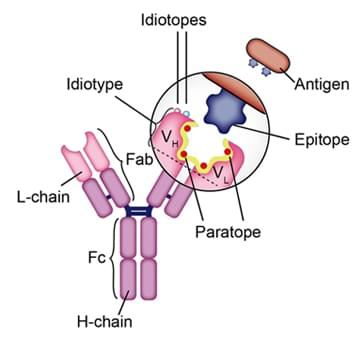
Source: creative-biolabs

### Objective
- To explored the optimal predicting model/s based on proteins sequence and physicochemical properties of B-cells epitopes interaction to SARS  for the use of vaccine development.

#### Source of Data
- The collected train datasets contain 14387 unique B-cell epitopes and 520 SARS epitopes including the targets value. The test dataset has 20312 observations of different amino acids and peptides sequences together with the physicochemical properties to make binding of antigen-antibody interactions. The data found from Kaggle and IEDB B-cell epitope databases.

### Contents

These are the contents of the project:

- [1 Load the Dataset](#1-Load-the-Data)
 * [1.1 Importing Libraries](#1.1-Import-the-libraries)
 
- [2.0 Features Engineering](#2.0-Features-Engineering)
 
- [3.0 Grid Search Results](#3.0-Grid-Search-Results)
 * [3.1 XGBoost Grid Rearch Results](#3.1-XGBoost-Grid-Rearch-Results)
 * [3.2 Random Forest Grid Search Results](#3.2-Random-Forest-Grid-Search-Results)
 * [3.3 Logistic Regression Grid Search Results](#3.3-Logistic-Regression-Grid-Search-Results)
 * [3.4 Deep Leaning Grid Search Results](#3.4-Deep-Leaning-Grid-Search-Results)
     * [3.4.1 Principal Component Analysis](#3.4.1-Principal-Component-Analysis)

- [4.0 Comparison of Best Models](#4.0-Comparison-of-Best-Models)
 * [4.1 All ROC Curves of the Models](#4.1-All-ROC-Curves-of-the-Models)
 * [4.2 Prediction on Out of Time Dataset](#4.2-Prediction-on-Out-of-Time-Dataset)
 
     
- [5.0 Conclusions](#5.0-Conclusions)
      
- [6.0 References](#6.0-References)

## 1 Load the Dataset

### 1.1 Importing Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
import plotly.express as px # plotting
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, auc
from sklearn.metrics import roc_curve,  roc_auc_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix, classification_report
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tf.__version__

'2.5.0'

In [3]:
df_bcell = pd.read_csv('./data/input_bcell.csv')
df_sars = pd.read_csv('./data/input_sars.csv')

df_covid = pd.read_csv('./data/input_covid.csv') #Out of Test(OOT) datasets

In [4]:
# Combine the two datasets
df = pd.concat([df_bcell,df_sars]).reset_index(drop=True)
df.shape

(14907, 14)

## 2.0 Features Engineering

### OneHoteEncoding

In [5]:
dm1 = pd.get_dummies(df['parent_protein_id'], drop_first=True)
dm2 = pd.get_dummies(df['protein_seq'], drop_first=True)
dm3 = pd.get_dummies(df['peptide_seq'], drop_first=True)

df_ = pd.concat([df,dm1,dm2,dm3], axis=1)

In [6]:
X = df_.drop(['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'], axis=1)
y = df_['target']

### Splitting the data set into training and test data sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y)

X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)

y_train, y_test, = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [13]:
print("Number features in the train dataset: ", X_train.shape)
print("Number of the Output in the train dataset: ", y_train.shape)
print("Number features in the test dataset: ", X_test.shape)
print("Number of the Output test dataset: ", y_test.shape)

Number features in the train dataset:  (11925, 16367)
Number of the Output in the train dataset:  (11925,)
Number features in the test dataset:  (2982, 16367)
Number of the Output test dataset:  (2982,)


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train.values)
X_test_sd = sc.transform(X_test.values)

## 3.0 Grid Search Results

### 3.1 XGBoost Grid Rearch Results

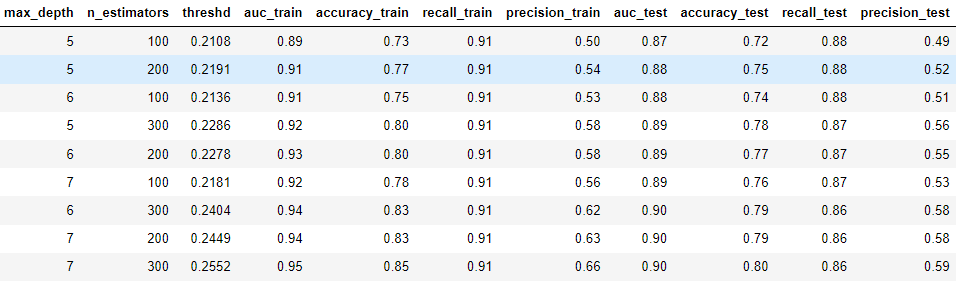

In [8]:
# Using best hyperparameters
clf_xgb_best = XGBClassifier(random_state=123, max_depth=5, n_estimators=100,
                            gamma=1, learning_rate=0.1,
                            eval_metric = "logloss",
                            objective='binary:logistic')
# threshold = 0.2108

In [12]:
clf_xgb_best.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [32]:
print("Test data set: XGBoost\n")
print("Accuracy: ", accuracy_score(y_test, np.where(clf_xgb_best.predict_proba(X_test)[:,1]>0.2108,1,0)))
print("Precision: ", precision_score(y_test, np.where(clf_xgb_best.predict_proba(X_test)[:,1]>0.2108,1,0)))
print("Recall:   ", recall_score(y_test, np.where(clf_xgb_best.predict_proba(X_test)[:,1]>0.2108,1,0)))

Test data set: XGBoost

Accuracy:  0.7236753856472167
Precision:  0.4947589098532495
Recall:    0.8751545117428925


<AxesSubplot:>

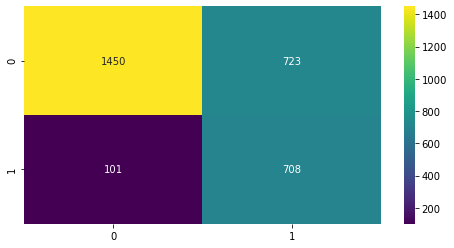

In [33]:
cm_xgb = confusion_matrix(y_test, np.where(clf_xgb_best.predict_proba(X_test)[:,1]>0.2108,1,0))
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_xgb, annot=True, cmap="viridis", fmt='d')

### 3.2 Random Forest Grid Search Results

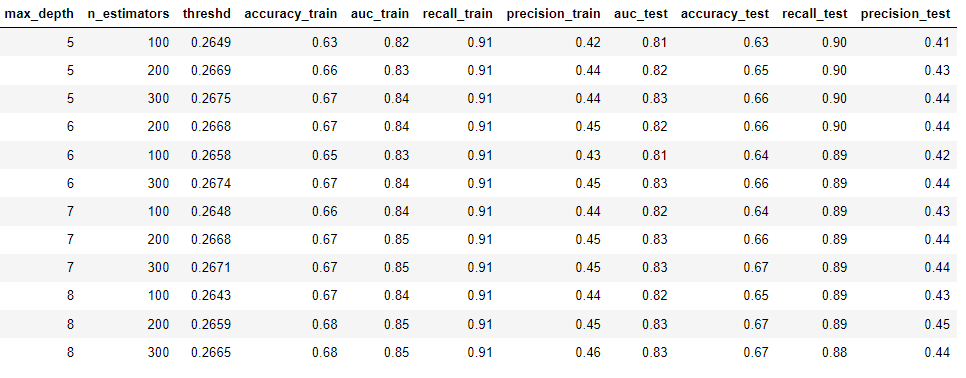

In [24]:
# Using best hyperparameters
clf_rf_best = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, 
                                     criterion='entropy')
# threshold = 0.2649

In [25]:
clf_rf_best.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [30]:
print("Test data set: Random Forest\n")
print("Accuracy: ", accuracy_score(y_test, np.where(clf_rf_best.predict_proba(X_test)[:,1]>0.2649,1,0)))
print("Precision: ", precision_score(y_test, np.where(clf_rf_best.predict_proba(X_test)[:,1]>0.2649,1,0)))
print("Recall:   ", recall_score(y_test, np.where(clf_rf_best.predict_proba(X_test)[:,1]>0.2649,1,0)))

Test data set: Random Forest

Accuracy:  0.6240778001341382
Precision:  0.4117647058823529
Recall:    0.899876390605686


<AxesSubplot:>

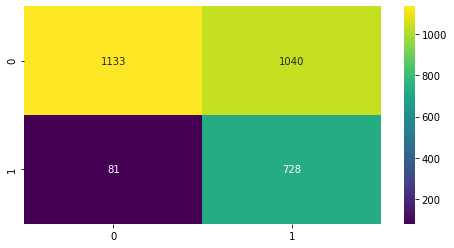

In [34]:
cm_rf = confusion_matrix(y_test, np.where(clf_rf_best.predict_proba(X_test)[:,1]>0.2649,1,0))
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_rf, annot=True, cmap="viridis", fmt='d');

### 3.3 Logistic Regression Grid Search Results

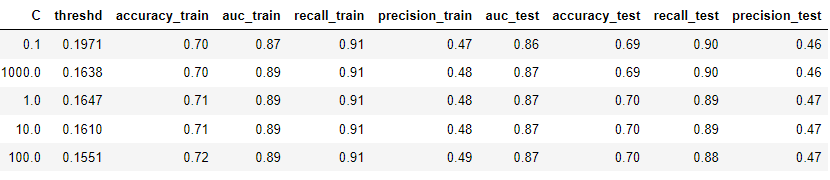

In [112]:
# Using best hyperparameters
clf_lr_best = LogisticRegression(random_state=123, C=0.1, max_iter=600, solver='lbfgs')
# threshol = 0.1971

In [113]:
clf_lr_best.fit(X_train_sd, y_train)

LogisticRegression(C=0.1, max_iter=600, random_state=123)

In [114]:
print("Test data set: Logistic Regression\n")
print("Accuracy: ", accuracy_score(y_test, np.where(clf_lr_best.predict_proba(X_test_sd)[:,1]>0.1971,1,0)))
print("Precision: ", precision_score(y_test, np.where(clf_lr_best.predict_proba(X_test_sd)[:,1]>0.1971,1,0)))
print("Recall:   ", recall_score(y_test, np.where(clf_lr_best.predict_proba(X_test_sd)[:,1]>0.1971,1,0)))

Test data set: Logistic Regression

Accuracy:  0.7293762575452716
Precision:  0.5625
Recall:    0.011124845488257108


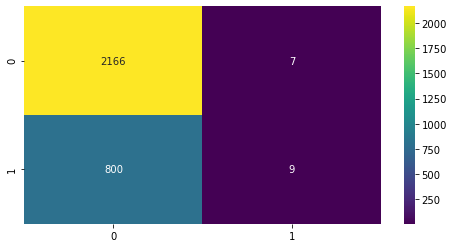

In [115]:
cm_lg = confusion_matrix(y_test, np.where(clf_lr_best.predict_proba(X_test)[:,1]>0.1971,1,0))
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_lg, annot=True, cmap="viridis", fmt='d');

### 3.4 Deep Leaning Grid Search Results

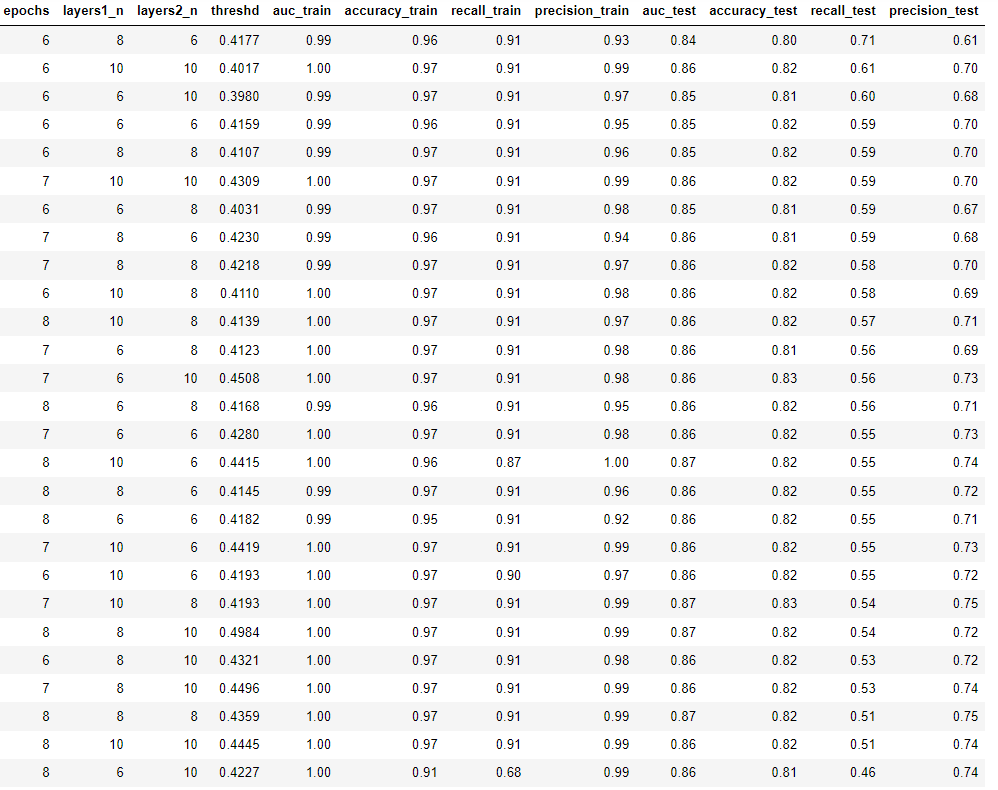

#### 3.4.1 Principal Component Analysis

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=0.75)

In [41]:
X_train_sd2 = pca.fit_transform(X_train_sd)
X_test_sd2 = pca.transform(X_test_sd)

In [42]:
# Using best hyperparameters
tf.random.set_seed(1)

clf_tf_best = Sequential()
#layer 1
clf_tf_best.add(Dense(units=8, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.L2(0.01),input_shape=(X_train_sd2.shape[1], )))
clf_tf_best.add(Dropout(0.25)) 
#layer 2
clf_tf_best.add(Dense(units=6, activation='relu', kernel_regularizer=regularizers.L2(0.01), kernel_initializer='normal'))
clf_tf_best.add(Dropout(0.25)) #Adding a Dropout layer
#output
clf_tf_best.add(Dense(units=1, activation='sigmoid'))
#Compiling model
clf_tf_best.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf_tf_best.fit(X_train_sd2, y_train, batch_size = 512, epochs=6);

Epoch 1/6
24/24 [==============================] - 0s 7ms/step - loss: 1.9387 - accuracy: 0.6812
Epoch 2/6
24/24 [==============================] - 0s 7ms/step - loss: 1.2925 - accuracy: 0.7255
Epoch 3/6
24/24 [==============================] - 0s 7ms/step - loss: 0.9551 - accuracy: 0.7288
Epoch 4/6
24/24 [==============================] - 0s 9ms/step - loss: 0.7629 - accuracy: 0.7289
Epoch 5/6
24/24 [==============================] - 0s 10ms/step - loss: 0.6423 - accuracy: 0.7289
Epoch 6/6
24/24 [==============================] - 0s 9ms/step - loss: 0.5644 - accuracy: 0.7289


In [43]:
print("Test data set: TensorFlow Keras\n")
print("Accuracy: ", accuracy_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0)))
print("Precision: ", precision_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0)))
print("Recall:   ", recall_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0)))

Test data set: TensorFlow Keras

Accuracy:  0.8189134808853119
Precision:  0.7091757387247278
Recall:    0.5636588380716935


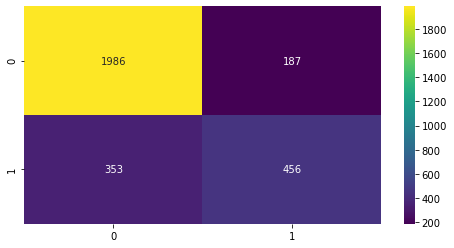

In [54]:
cm_tf = confusion_matrix(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0))
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_tf, annot=True, cmap="viridis", fmt='d');

## 4.0 Comparison of Best Models

In [122]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [123]:
xgb_tpr_test = recall_score(y_test, np.where(clf_xgb_best.predict_proba(X_test)[:,1]>0.2649,1,0))
rf_tpr_test = recall_score(y_test, np.where(clf_rf_best.predict_proba(X_test)[:,1]>0.2649,1,0))
lr_tpr_test = recall_score(y_test, np.where(clf_lr_best.predict_proba(X_test_sd)[:,1]>0.2649,1,0))
tf_tpr_test = recall_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0))

xgb_auc_test = roc_auc_score(y_test, np.where(clf_xgb_best.predict_proba(X_test)[:,1]>0.2649,1,0))
rf_auc_test = roc_auc_score(y_test, np.where(clf_rf_best.predict_proba(X_test)[:,1]>0.2649,1,0))
lr_auc_test =roc_auc_score(y_test, np.where(clf_lr_best.predict_proba(X_test_sd)[:,1]>0.2649,1,0))
tf_auc_test = roc_auc_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0))

In [124]:
res_all = pd.DataFrame({'Model':[],'Threshold':[], 'TPR_test':[], 'AUC_test':[]})

res_all['Model'] = ['XGBoost', 'Random Forest', 'Log Reg', 'TensorFlow (Deep Leaning)']

res_all['Threshold'] = [0.2108, 0.2649,0.1971, 0.4177]
res_all['TPR_test'] = [xgb_tpr_test, rf_tpr_test, lr_tpr_test, tf_tpr_test]
res_all['AUC_test'] = [xgb_auc_test, rf_auc_test, lr_auc_test, tf_auc_test]
res_all

,Model,Threshold,TPR_test,AUC_test
0,XGBoost,0.2108,0.831891,0.788472
1,Random Forest,0.2649,0.899876,0.710638
2,Log Reg,0.1971,0.512979,0.726347
3,TensorFlow (Deep Leaning),0.4177,0.563659,0.738801


## 4.1 All ROC Curves the Models

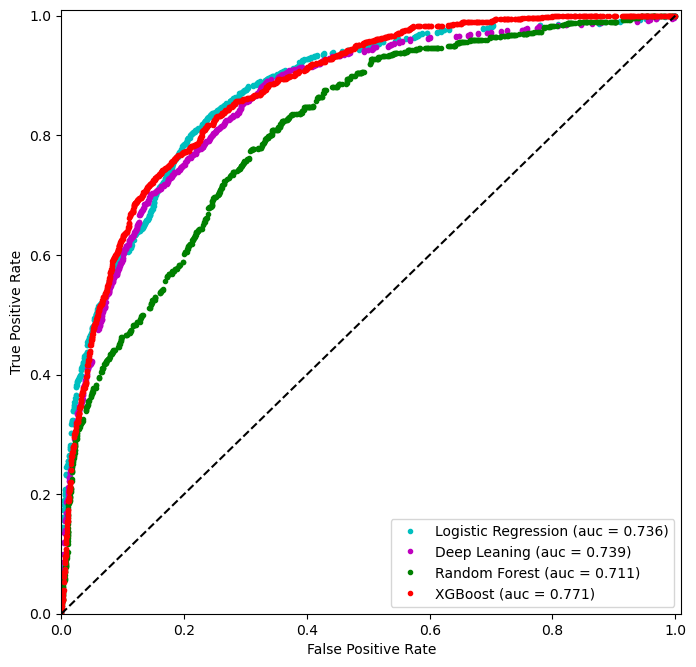

In [126]:
lr_fpr, lr_tpr, threshold = roc_curve(y_test, clf_lr_best.predict_proba(X_test_sd)[:, 1])
auc_lr = roc_auc_score(y_test, np.where(clf_lr_best.predict_proba(X_test_sd)[:, 1]>0.1971, 1.0,0))

TF_fpr, TF_tpr, threshold = roc_curve(y_test, clf_tf_best.predict(X_test_sd2))
auc_TF = roc_auc_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177, 1, 0))

rf_fpr, rf_tpr, threshold = roc_curve(y_test, clf_rf_best.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, np.where(clf_rf_best.predict_proba(X_test)[:, 1]>0.2649, 1.0,0))

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, clf_xgb_best.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, np.where(clf_xgb_best.predict_proba(X_test)[:, 1]>0.2108, 1.0,0))

plt.figure(figsize=(8, 8), dpi=100)

plt.plot(lr_fpr, lr_tpr,  '.c',  label='Logistic Regression (auc = %0.3f)' % auc_lr)
plt.plot(TF_fpr, TF_tpr,  '.m',  label='Deep Leaning (auc = %0.3f)' % auc_TF)
plt.plot(rf_fpr, rf_tpr,  '.g',  label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(xgb_fpr, xgb_tpr, '.r',label='XGBoost (auc = %0.3f)' % auc_xgb)
plt.plot([0,1], [0,1], '--k')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.legend();

## 4.2 Prediction on Out of Time Dataset

In [142]:
dm1_ = pd.get_dummies(df_covid['parent_protein_id'], drop_first=True)
dm2_ = pd.get_dummies(df_covid['protein_seq'], drop_first=True)
dm3_ = pd.get_dummies(df_covid['peptide_seq'], drop_first=True)

df_covid_ = pd.concat([df_covid,dm1_,dm2_,dm3_], axis=1)

df_covid_.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,...,YYVGYLQPRTF,YYVGYLQPRTFL,YYVGYLQPRTFLL,YYVGYLQPRTFLLK,YYVGYLQPRTFLLKY,YYVGYLQPRTFLLKYN,YYVGYLQPRTFLLKYNE,YYVGYLQPRTFLLKYNEN,YYVGYLQPRTFLLKYNENG,YYVGYLQPRTFLLKYNENGT
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,...,0,0,0,0,0,0,0,0,0,0
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,...,0,0,0,0,0,0,0,0,0,0
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,...,0,0,0,0,0,0,0,0,0,0
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,...,0,0,0,0,0,0,0,0,0,0
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df_covid_.shape

(20312, 20317)

In [144]:
X_new = df_covid_.drop(['parent_protein_id', 'protein_seq', 'peptide_seq'], axis=1)
X_new.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,...,YYVGYLQPRTF,YYVGYLQPRTFL,YYVGYLQPRTFLL,YYVGYLQPRTFLLK,YYVGYLQPRTFLLKY,YYVGYLQPRTFLLKYN,YYVGYLQPRTFLLKYNE,YYVGYLQPRTFLLKYNEN,YYVGYLQPRTFLLKYNENG,YYVGYLQPRTFLLKYNENGT
0,1,5,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603,...,0,0,0,0,0,0,0,0,0,0
1,2,6,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603,...,0,0,0,0,0,0,0,0,0,0
2,3,7,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603,...,0,0,0,0,0,0,0,0,0,0
3,4,8,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603,...,0,0,0,0,0,0,0,0,0,0
4,5,9,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603,...,0,0,0,0,0,0,0,0,0,0


In [158]:
X_OOT = pd.DataFrame(np.zeros([df_covid_.shape[0], len(X_train.columns)]),columns=X_train.columns)
X_OOT.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,...,YYFTDEYIAA,YYLIPVASSSKDV,YYLQFCQGQKSSLTP,YYPDEIFRSDTLYLT,YYPSKNLAPI,YYQKWMEE,YYQSAGRNSWNC,YYREMFAHH,YYRMMQTV,YYVPLGTQYT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
pd.Series(X_new.columns)

0              start_position
1                end_position
2                 chou_fasman
3                       emini
4         kolaskar_tongaonkar
                 ...         
20309        YYVGYLQPRTFLLKYN
20310       YYVGYLQPRTFLLKYNE
20311      YYVGYLQPRTFLLKYNEN
20312     YYVGYLQPRTFLLKYNENG
20313    YYVGYLQPRTFLLKYNENGT
Length: 20314, dtype: object

In [160]:
pd.Series(X_train.columns)

0             start_position
1               end_position
2                chou_fasman
3                      emini
4        kolaskar_tongaonkar
                ...         
16362               YYQKWMEE
16363           YYQSAGRNSWNC
16364              YYREMFAHH
16365               YYRMMQTV
16366             YYVPLGTQYT
Length: 16367, dtype: object

In [161]:
len(pd.Series(X_train.columns)[pd.Series(X_train.columns).isin(pd.Series(X_new.columns))])

93

In [162]:
for col in X_train.columns:
    if col in X_new.columns:
        X_OOT[col] = X_new[col]

In [163]:
df_covid['Predicted_proba_xgb'] = clf_xgb_best.predict_proba(X_OOT)[:,1]
df_covid['Predicted_class_xgb'] = np.where(clf_xgb_best.predict_proba(X_OOT)[:,1]>0.2108,1,0)

In [165]:
df_covid['Predicted_proba_rf'] = clf_rf_best.predict_proba(X_OOT)[:,1]
df_covid['Predicted_class_rf'] = np.where(clf_rf_best.predict_proba(X_OOT)[:,1]>0.2649, 1,0)

In [175]:
X_OOT_sd = sc.transform(X_OOT.values)
X_OOT_sd2 = pca.transform(X_OOT_sd)

In [177]:
col=['parent_protein_id','protein_seq','isoelectric_point','Predicted_proba_xgb',
    'Predicted_class_xgb','Predicted_proba_rf','Predicted_class_rf']

In [193]:
df_covid['Predicted_class_rf'].value_counts()

1    20312
Name: Predicted_class_rf, dtype: int64

In [192]:
df_covid['Predicted_class_xgb'].value_counts()

1    20024
0      288
Name: Predicted_class_xgb, dtype: int64

In [179]:
df_covid.to_csv('Predction_class_for_covid_data.csv', index=False)

## 5.0 Conclusions
- The models XGBoost, Random Forest, Logistic Regression, and Deep Leaning were selected as per the baseline of model selection and the nature of the datasets. The results were showed that the selected models performed successfully to predict B-cell epitopes in the interaction of the SARS-Covid protein. The recall of the models was kept at 91% to give the greatest attention to all the positive predictions. This threshold is highly required in the vaccine development as much as possible to get the highest positive class. The random forest specifically performed about 90% for 27% positive bassline data. XGBoost also shows very promising results of predicting the epitope interaction about 83%. In the global evolution (AUC) XGBoost performed better about 77% as compared with other models for B-cell epitopes and sars-covid virus interaction. Successfully trained random forest and XGBoost models were used to predict the test data to distinguish pathogenic proteins (Covid virus-cell) from human B-cell antibodies. In addition, the predicted results consist of the perfect experiential conditions with their probabilities of effective interaction in the vaccine development processes. In conclusion, the approaches were used in the project and the findings highlight that the epitopes interaction to the antibodies can be potential vaccine targets against SARS-Covid. The methods used also can be applied for the identification of epitopes interaction from other emerging pathogens to develop potential vaccines against various new strains.

- The limitations of this work were mainly coming from the highest computational capacities requirement due to the large size of the train and test data in the model development.

## 6.0 References

- Crooke, S. N., Ovsyannikova, I. G., Kennedy, R. B., & Poland, G. A. (2020). Immunoinformatic identification of B cell and T cell epitopes in the SARS-CoV-2 proteome. Scientific reports, 10(1), 1-15.

- Di Natale, C., La Manna, S., De Benedictis, I., Brandi, P., & Marasco, D. (2020). Perspectives in peptide-based vaccination strategies for syndrome coronavirus 2 pandemic. Frontiers in Pharmacology, 11.

- Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media.

- Kukol, A. (Ed.). (2008). Molecular modeling of proteins (Vol. 443). Totowa, NJ:: Humana Press.

- Sanchez-Trincado, J. L., Gomez-Perosanz, M., & Reche, P. A. (2017). Fundamentals and methods for T-and B-cell epitope prediction. Journal of immunology research, 2017.

- Yang, X., & Yu, X. (2009). An introduction to epitope prediction methods and software. Reviews in medical virology, 19(2), 77-96.